# Tensor

---

## Import

In [1]:
import tensorflow as tf
import numpy as np
# import more


---

## Basic

---

 ### scalar


In [2]:
r_0_ts = tf.constant(4)
print(r_0_ts)

tf.Tensor(4, shape=(), dtype=int32)


### vector

In [3]:
r_1_ts = tf.constant([1., 2., 3.])
print(r_1_ts)

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


### matrix

In [4]:
r_2_ts = tf.constant([[1., 2., 3.], [4., 5., 6.]])
print(r_2_ts)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)


### more axes

In [5]:
r_m_ts = tf.constant([[[1, 2, 3],[1, 2, 3]],
                       [[2, 3, 4], [7, 8, 9]], 
                       [[3, 4, 5], [5, 6, 7]]])
print(r_m_ts)

tf.Tensor(
[[[1 2 3]
  [1 2 3]]

 [[2 3 4]
  [7 8 9]]

 [[3 4 5]
  [5 6 7]]], shape=(3, 2, 3), dtype=int32)


### convert to numpy

In [6]:
np.array(r_m_ts)
r_m_ts.numpy()

array([[[1, 2, 3],
        [1, 2, 3]],

       [[2, 3, 4],
        [7, 8, 9]],

       [[3, 4, 5],
        [5, 6, 7]]])

### basic math 

In [7]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # Could have also said `tf.ones([2,2], dtype=tf.int32)`

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [8]:
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [9]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

# Find the largest value
print(tf.reduce_max(c))
# Find the index of the largest value
print(tf.math.argmax(c))
# Compute the softmax
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105854e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


### convert to tensor

In [10]:
tf.convert_to_tensor([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

In [11]:
print(tf.reduce_max([[1,2,3], [4, 5, 6]]))

tf.Tensor(6, shape=(), dtype=int32)


In [12]:
tf.reduce_max(np.array([1,2,3]))

<tf.Tensor: shape=(), dtype=int32, numpy=3>

---

### About shapes
- Tensors have shapes. Some vocabulary:

    - Shape: The length (number of elements) of each of the axes of a tensor.
    - Rank: Number of tensor axes. A scalar has rank 0, a vector has rank 1, a matrix is rank 2.
    - Axis or Dimension: A particular dimension of a tensor.
    - Size: The total number of items in the tensor, the product of the shape vector's elements.

In [13]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])

In [14]:
print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim) # not return tensor
print("Shape of tensor:", rank_4_tensor.shape) # not return tensor
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


In [15]:
tf.rank(rank_4_tensor) # replace ndim it return tensor, but a scalar
tf.shape(rank_4_tensor) # replace shape, it's a vector

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([3, 2, 4, 5])>

### Indexing

In [16]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())    
print("First:", rank_1_tensor[0].numpy())
print("Second:", rank_1_tensor[1].numpy())
print("Last:", rank_1_tensor[-1].numpy())

[ 0  1  1  2  3  5  8 13 21 34]
First: 0
Second: 1
Last: 34


In [17]:
print("Everything:", rank_1_tensor[:].numpy())
print("Before 4:", rank_1_tensor[:4].numpy())
print("From 4 to the end:", rank_1_tensor[4:].numpy())
print("From 2, before 7:", rank_1_tensor[2:7].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

Everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4: [0 1 1 2]
From 4 to the end: [ 3  5  8 13 21 34]
From 2, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed: [34 21 13  8  5  3  2  1  1  0]


In [18]:
rank_2_tensor = tf.constant([[1., 2., 3.], [4., 5., 6.]])
print(rank_2_tensor.numpy())

[[1. 2. 3.]
 [4. 5. 6.]]


In [19]:
# Pull out a single value from a 2-rank tensor
print(rank_2_tensor[1, 1].numpy())

5.0


In [20]:
# Get row and column tensors
print("origin tf:", rank_2_tensor)
print("Second row:", rank_2_tensor[1:, :].numpy())
print("Second column:", rank_2_tensor[:, 1].numpy())
print("Last row:", rank_2_tensor[-1::-1, -1::-1].numpy())
print("First item in last column:", rank_2_tensor[0, -1].numpy())
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy(), "\n")

origin tf: tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
Second row: [[4. 5. 6.]]
Second column: [2. 5.]
Last row: [[6. 5. 4.]
 [3. 2. 1.]]
First item in last column: 3.0
Skip the first row:
[[4. 5. 6.]] 



### Manipulating Shapes

In [21]:
x = tf.constant([[1], [2], [3]])
print(x.shape)

(3, 1)


In [22]:
print(x.shape.as_list())

[3, 1]


In [23]:
# You can reshape a tensor to a new shape.
# Note that you're passing in a list
reshaped = tf.reshape(x, [1, 3])
reshaped

<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[1, 2, 3]])>

In [24]:
rank_3_tensor = tf.constant([[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]],
                            [[10, 11, 12, 13, 14], [15, 16, 17, 18, 19]],
                            [[20, 21, 22, 23, 24],[25, 26, 27, 28, 29]]])
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


In [25]:
print(tf.reshape(rank_3_tensor, [-1])) # -1 means "Whatever fits"

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


In [26]:
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


In [27]:
# Bad examples: don't do this

# You can't reorder axes with reshape.
print(tf.reshape(rank_3_tensor, [2, 3, 5]), "\n") 

# This is a mess
print(tf.reshape(rank_3_tensor, [5, 6]), "\n")

# This doesn't work at all
try:
  tf.reshape(rank_3_tensor, [7, -1])
except Exception as e:
  print(f"{type(e).__name__}: {e}")

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]], shape=(2, 3, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]], shape=(5, 6), dtype=int32) 

InvalidArgumentError: {{function_node __wrapped__Reshape_device_/job:localhost/replica:0/task:0/device:GPU:0}} Input to reshape is a tensor with 30 values, but the requested shape requires a multiple of 7 [Op:Reshape]


### More on DTypes

In [28]:
the_f64_tensor = tf.constant([2.2, 3.3, 4.6], dtype=tf.float64)
the_f16_tensor = tf.cast(the_f64_tensor, dtype=tf.float16)
# Now, cast to an uint8 and lose the decimal precision
the_u8_tensor = tf.cast(the_f16_tensor, dtype=tf.uint8)
print(the_f64_tensor)
print(the_f16_tensor)
print(the_u8_tensor)

tf.Tensor([2.2 3.3 4.6], shape=(3,), dtype=float64)
tf.Tensor([2.2 3.3 4.6], shape=(3,), dtype=float16)
tf.Tensor([2 3 4], shape=(3,), dtype=uint8)


### Broadcasting

In [29]:
x = tf.constant([1, 2, 3])

y = tf.constant(2)
z = tf.constant([2, 2, 2])
# All of these are the same computation
print(tf.multiply(x, 2))
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


In [30]:
x = tf.reshape(x,[3,1])
y = tf.range(1, 5)
print(x, "\n")
print(y, "\n")
print(tf.multiply(x, y))
print(x * y)

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)
tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


In [31]:
print(tf.broadcast_to(tf.constant([1, 2, 3, 4]), [4, 4]))

tf.Tensor(
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]], shape=(4, 4), dtype=int32)


### Ragged Tensors

In [32]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

In [33]:
try:
  tensor = tf.constant(ragged_list)
except Exception as e:
  print(f"{type(e).__name__}: {e}")

ValueError: Can't convert non-rectangular Python sequence to Tensor.


In [34]:
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


In [35]:
print(ragged_tensor.shape)


(4, None)


### String tensors

In [36]:
scalar_string_tensor = tf.constant("Gray wolf")
scalar_string_tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'Gray wolf'>

In [37]:
# If you have three string tensors of different lengths, this is OK.
tensor_of_strings = tf.constant(["Gray wolf",
                                 "Quick brown fox",
                                 "Lazy dog"])
# Note that the shape is (3,). The string length is not included.
print(tensor_of_strings)

tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)


In [38]:
print(tf.strings.split(scalar_string_tensor, sep=" "))

tf.Tensor([b'Gray' b'wolf'], shape=(2,), dtype=string)


In [39]:
# tf.strings.split() function to strings will change the tensor type to ragged tansor
print(tf.strings.split(tensor_of_strings))

<tf.RaggedTensor [[b'Gray', b'wolf'], [b'Quick', b'brown', b'fox'], [b'Lazy', b'dog']]>


In [40]:
text = tf.constant("1 10 100")
print(tf.strings.to_number(tf.strings.split(text, " ")))

tf.Tensor([  1.  10. 100.], shape=(3,), dtype=float32)


In [41]:
byte_strings = tf.strings.bytes_split(tf.constant("Duck"))
byte_ints = tf.io.decode_raw(tf.constant("Duck"), tf.uint8)
print("Byte strings:", byte_strings)
print("Bytes:", byte_ints)
# same as ascii type change

Byte strings: tf.Tensor([b'D' b'u' b'c' b'k'], shape=(4,), dtype=string)
Bytes: tf.Tensor([ 68 117  99 107], shape=(4,), dtype=uint8)


In [42]:
# Or split it up as unicode and then decode it
unicode_bytes = tf.constant("アヒル 🦆")
unicode_char_bytes = tf.strings.unicode_split(unicode_bytes, "UTF-8")
unicode_values = tf.strings.unicode_decode(unicode_bytes, "UTF-8")

print("\nUnicode bytes:", unicode_bytes)
print("\nUnicode chars:", unicode_char_bytes)
print("\nUnicode values:", unicode_values)


Unicode bytes: tf.Tensor(b'\xe3\x82\xa2\xe3\x83\x92\xe3\x83\xab \xf0\x9f\xa6\x86', shape=(), dtype=string)

Unicode chars: tf.Tensor([b'\xe3\x82\xa2' b'\xe3\x83\x92' b'\xe3\x83\xab' b' ' b'\xf0\x9f\xa6\x86'], shape=(5,), dtype=string)

Unicode values: tf.Tensor([ 12450  12498  12523     32 129414], shape=(5,), dtype=int32)


### Sparse tensors

In [44]:
# Sparse tensors store values by index in a memory-efficient manner
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
print(sparse_tensor, "\n")

# You can convert sparse tensors to dense
print(tf.sparse.to_dense(sparse_tensor))

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64)) 

tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)


---

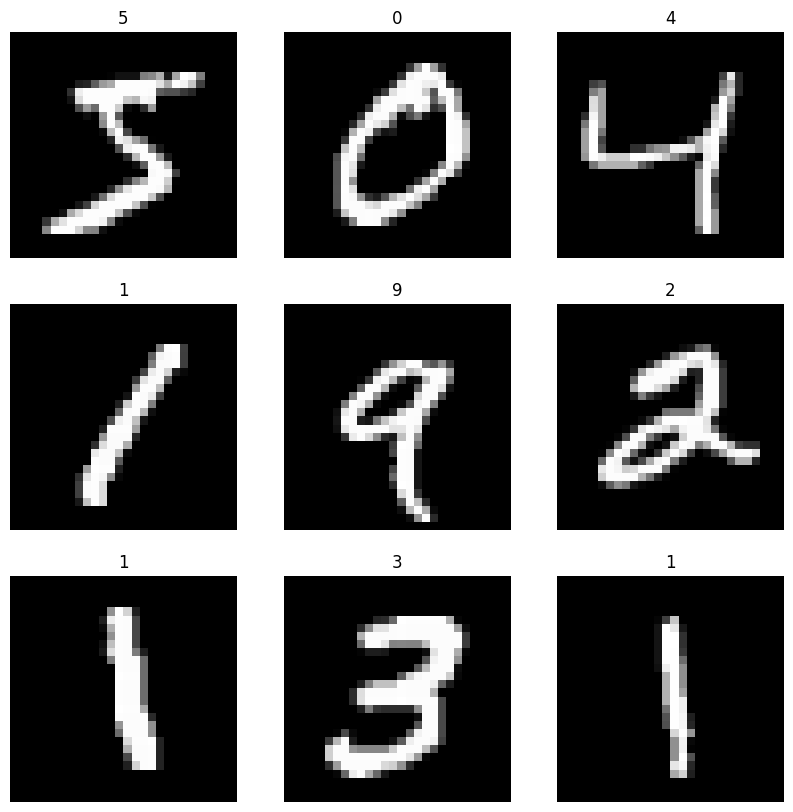

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.1797 - accuracy: 0.9440 - val_loss: 0.0509 - val_accuracy: 0.9844
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0592 - accuracy: 0.9821 - val_loss: 0.0291 - val_accuracy: 0.9898
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0416 - accuracy: 0.9871 - val_loss: 0.0338 - val_accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0300 - val_accuracy: 0.9908
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0262 - accuracy: 0.9919 - val_loss: 0.0315 - val_accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0226 - accuracy: 0.9933 - val_loss: 0.0235 - val_accuracy: 0.9940
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0291 - val_accuracy

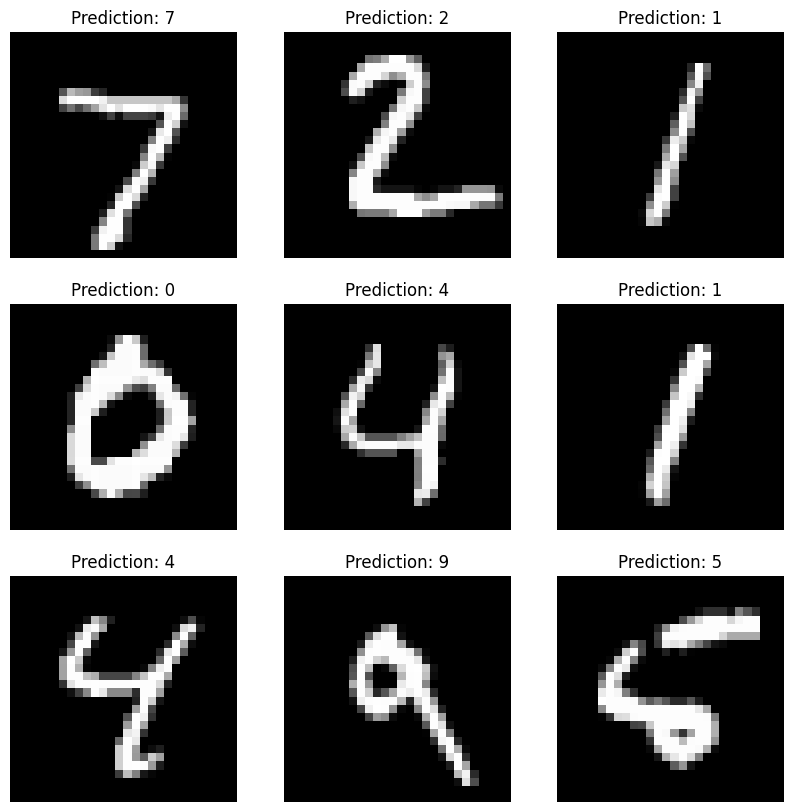

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load and prepare the MNIST dataset
def load_dataset():
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
    
    # Reshape the images to include the channels dimension (1 for grayscale)
    train_images = train_images.reshape((60000, 28, 28, 1))
    test_images = test_images.reshape((10000, 28, 28, 1))
    
    # Normalize pixel values between 0 and 1
    train_images = train_images.astype('float32') / 255.0
    test_images = test_images.astype('float32') / 255.0
    
    return train_images, train_labels, test_images, test_labels

# Build the CNN model
# 定义CNN模型
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10))  # 移除activation='softmax'
    
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    return model


# Train the model
def train_model(model, train_images, train_labels, test_images, test_labels):
    history = model.fit(train_images, train_labels, epochs=10, 
                        validation_data=(test_images, test_labels))
    return history

# Evaluate the model
def evaluate_model(model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f'Test accuracy: {test_acc}')

# Use the model for predictions
def make_predictions(model, test_images, test_labels):
    predictions = model.predict(test_images)
    return predictions

# Main function
def main():
    train_images, train_labels, test_images, test_labels = load_dataset()
    
    # Optional: Visualize some images
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(train_images[i].reshape((28, 28)), cmap='gray')
        plt.title(train_labels[i])
        plt.axis('off')
    plt.show()
    
    model = build_model()
    history = train_model(model, train_images, train_labels, test_images, test_labels)
    evaluate_model(model, test_images, test_labels)
    
    # Example usage: Make predictions on a few test images
    predictions = make_predictions(model, test_images[:9], test_labels[:9])
    predicted_labels = tf.argmax(predictions, axis=1)
    
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(test_images[i].reshape((28, 28)), cmap='gray')
        plt.title(f'Prediction: {predicted_labels[i]}')
        plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()
